In [1]:
from fastai.vision.all import *
from pathlib import Path

In [2]:
path = Path('Detect AI-Generated Faces High-Quality Dataset')

In [3]:
type(path)

pathlib.PosixPath

In [4]:
import zipfile

try:
    with zipfile.ZipFile('Detect AI-Generated Faces High-Quality Dataset.zip', 'r') as zip_ref:
        zip_ref.extractall('Detect AI-Generated Faces High-Quality Dataset')
except zipfile.BadZipFile:
    print("Error: Invalid zip file. Please provide a valid 'flowers.zip' file.")
except FileNotFoundError:
    print("Error: 'Detect AI-Generated Faces High-Quality Dataset.zip' not found. Please upload the zip file to your runtime environment.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [5]:
dls = ImageDataLoaders.from_folder(path,valid_pct=0.2, seed=42, item_tfms=Resize(224), batch_tfms=aug_transforms())

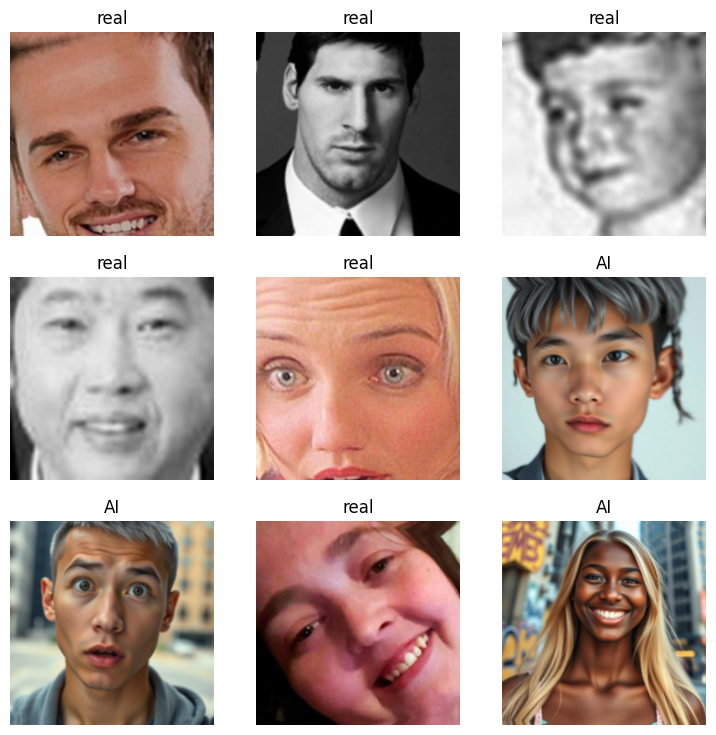

In [7]:
dls.show_batch()

In [8]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 57.5MB/s]


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0008317637839354575)

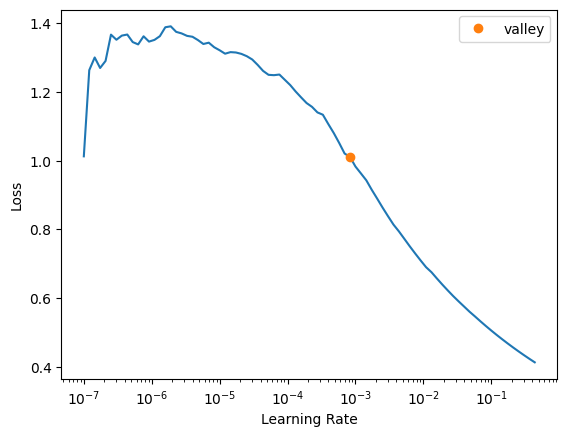

In [9]:
learn.lr_find()

In [10]:
learn.fine_tune(5, 0.0008317637839354575)

epoch,train_loss,valid_loss,error_rate,time
0,0.380722,0.049486,0.018750,16:53


epoch,train_loss,valid_loss,error_rate,time
0,0.023624,0.001086,0.000000,25:21
1,0.009434,0.000163,0.000000,25:02
2,0.004805,0.000109,0.000000,25:14
3,0.003016,0.000082,0.000000,25:13
4,0.001631,0.000068,0.000000,25:18


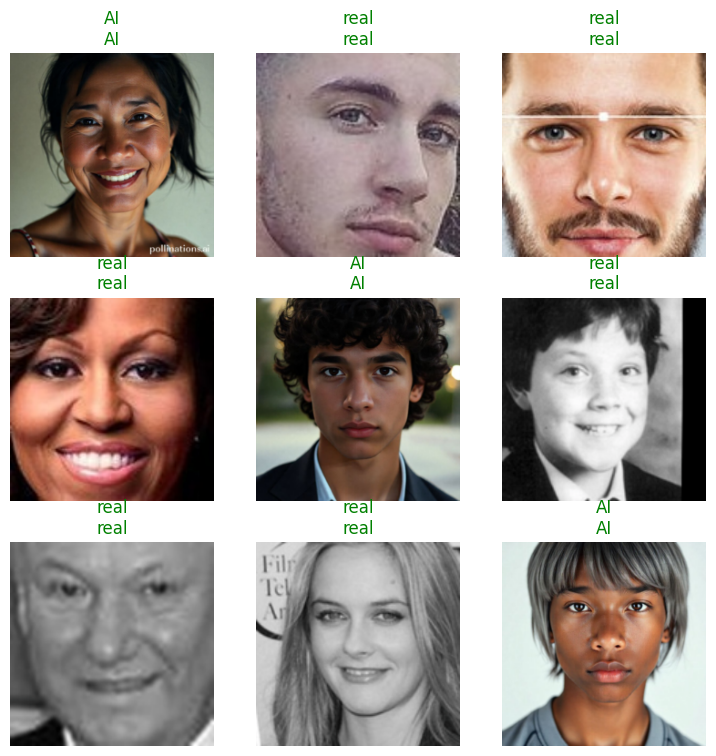

In [11]:
learn.show_results()

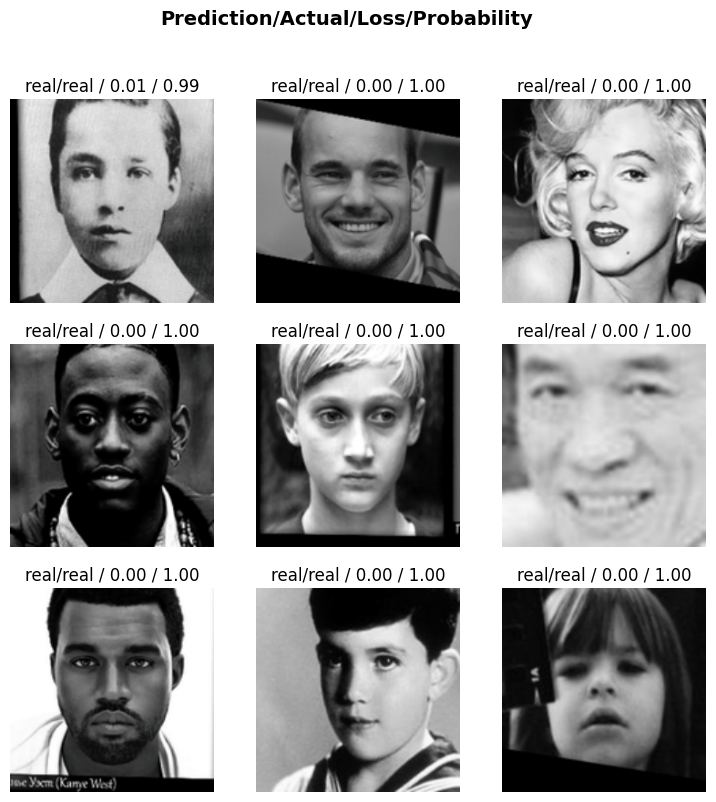

In [12]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(k=9)

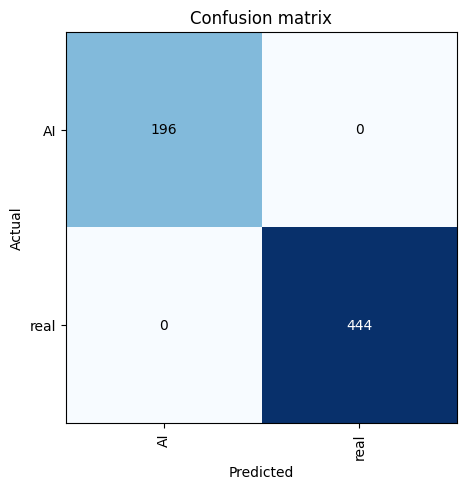

In [13]:
ClassificationInterpretation.from_learner(learn).plot_confusion_matrix()

In [14]:
learn.export('real_or_AI.pkl')

Prediction: AI; Probability: 0.9242


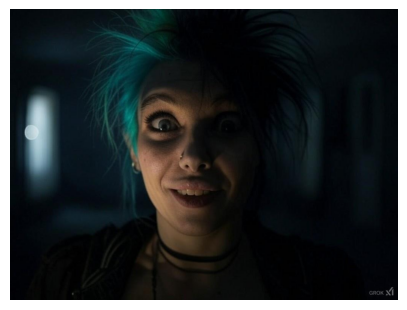

In [17]:
learn = load_learner('/content/Detect AI-Generated Faces High-Quality Dataset/real_or_AI.pkl')


image_path = Path('image.jpg')
img = PILImage.create(image_path)

pred,pred_idx,probs = learn.predict(img)


img.show()
print(f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}")

Prediction: real; Probability: 0.9995


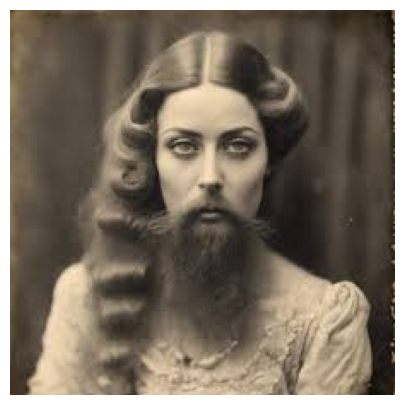

In [19]:
learn = load_learner('/content/Detect AI-Generated Faces High-Quality Dataset/real_or_AI.pkl')


image_path = Path('image2.jpeg')
img = PILImage.create(image_path)

pred,pred_idx,probs = learn.predict(img)


img.show()
print(f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}")